# Pandas

## Here you will find data on bank accounts, clients (each client is related to a bank account)

### The data also includes relevant district data of different districts the clients live in

In [73]:
import numpy as np
import pandas as pd

In [74]:
path = "./data/loans/"

In [75]:
account_df = pd.read_csv(path+"account.csv",sep=";")

account_df.head()

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


In [76]:
client_df = pd.read_csv(path+"client.csv",sep=";")

client_df.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [77]:
disp_df = pd.read_csv(path+"disp.csv",sep=";")

disp_df.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [78]:
district_df = pd.read_csv(path+"district.csv",sep=";")

district_df.head()

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [81]:
# Join (inner join) all the above tables, to one joined table named: df
# Please note: some of the common columns in the tables don't necessarily have identical names. You should detect them on your own.

### your code here
first_merge= pd.merge(account_df,client_df,on='district_id',how="inner")
#first_merge.head()
second_merge= pd.merge(first_merge,disp_df,on=['account_id','client_id'],how="inner")
#second_merge.head()
df= pd.merge(second_merge,district_df,left_on='district_id',right_on='code',how="inner")       # The last merge= inner join of all the above tables
df.head()
#df.shape

             
             
             
             

,account_id,district_id,frequency,date,client_id,birth_number,disp_id,type,code,name,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,192,55,monthly issuance,930108,232,215617,232,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
1,10364,55,monthly issuance,930117,12754,600820,12446,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
2,10364,55,monthly issuance,930117,12755,596101,12447,DISPONENT,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
3,497,55,monthly issuance,930415,597,430222,597,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
4,10105,55,monthly issuance,930428,12432,650307,12124,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894


In [82]:
df

,account_id,district_id,frequency,date,client_id,birth_number,disp_id,type,code,name,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,192,55,monthly issuance,930108,232,215617,232,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
1,10364,55,monthly issuance,930117,12754,600820,12446,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
2,10364,55,monthly issuance,930117,12755,596101,12447,DISPONENT,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
3,497,55,monthly issuance,930415,597,430222,597,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
4,10105,55,monthly issuance,930428,12432,650307,12124,OWNER,55,Brno - venkov,...,18,0,9,33.9,8743,1.88,2.43,111,3659,3894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870,3951,22,monthly issuance,970602,4766,670527,4766,OWNER,22,Domazlice,...,4,1,6,52.4,8620,1.10,1.25,100,1089,1117
4871,679,22,monthly issuance,970712,815,646027,815,OWNER,22,Domazlice,...,4,1,6,52.4,8620,1.10,1.25,100,1089,1117
4872,2182,22,monthly issuance,970712,2642,730904,2642,OWNER,22,Domazlice,...,4,1,6,52.4,8620,1.10,1.25,100,1089,1117
4873,2152,22,monthly issuance,971023,2604,260711,2604,OWNER,22,Domazlice,...,4,1,6,52.4,8620,1.10,1.25,100,1089,1117


In [83]:
# what is the maximum number of clients that are connected to an account?

### your code here

df.groupby('account_id')["client_id"].count().max()

# The number= 2

2

In [84]:
# what is the district id with the largest number of clients

### your code here
result= df.groupby("district_id")["client_id"].count().max()
#result
df["district_id"][result]

# The district_id= 1

1

In [85]:
# add a column to df that includes the the total number of unique accounts in the region listed in the row
# column name should be: region_unique_accounts

### your code here
df['region_unique_accounts']= df.groupby('region')['account_id'].transform('nunique')
df


,account_id,district_id,frequency,date,client_id,birth_number,disp_id,type,code,name,...,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,region_unique_accounts
0,192,55,monthly issuance,930108,232,215617,232,OWNER,55,Brno - venkov,...,0,9,33.9,8743,1.88,2.43,111,3659,3894,714
1,10364,55,monthly issuance,930117,12754,600820,12446,OWNER,55,Brno - venkov,...,0,9,33.9,8743,1.88,2.43,111,3659,3894,714
2,10364,55,monthly issuance,930117,12755,596101,12447,DISPONENT,55,Brno - venkov,...,0,9,33.9,8743,1.88,2.43,111,3659,3894,714
3,497,55,monthly issuance,930415,597,430222,597,OWNER,55,Brno - venkov,...,0,9,33.9,8743,1.88,2.43,111,3659,3894,714
4,10105,55,monthly issuance,930428,12432,650307,12124,OWNER,55,Brno - venkov,...,0,9,33.9,8743,1.88,2.43,111,3659,3894,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870,3951,22,monthly issuance,970602,4766,670527,4766,OWNER,22,Domazlice,...,1,6,52.4,8620,1.10,1.25,100,1089,1117,388
4871,679,22,monthly issuance,970712,815,646027,815,OWNER,22,Domazlice,...,1,6,52.4,8620,1.10,1.25,100,1089,1117,388
4872,2182,22,monthly issuance,970712,2642,730904,2642,OWNER,22,Domazlice,...,1,6,52.4,8620,1.10,1.25,100,1089,1117,388
4873,2152,22,monthly issuance,971023,2604,260711,2604,OWNER,22,Domazlice,...,1,6,52.4,8620,1.10,1.25,100,1089,1117,388


## Here you will find data on a specific telecom company

### You will find various data regarding each account

### The "churn" field indicates if the account had left the company in the previous month, or not

In [56]:
path = "./data/telecom/"

In [57]:
df = pd.read_csv(path+'telecom-churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [58]:
# convert churn column to int64

df['Churn'] = df['Churn'].astype('int64')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [59]:
# we can see churn/no churn ratios: how many 0 and how many 1

df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## More Questions

In [60]:
# use the value count method like above on the "churn" variable, inside the brackets use the parameter normalize=True to see the percent of churn

### your code here
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [61]:
# what are the averages for all numerical columns for churned users (the case where churn==1)

### your code here
df[df['Churn']==1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [65]:
# How much time (on average) do churned users spend on the phone during daytime?

### your code here
print( df[df['Churn']==1]['Total day minutes'].mean() , "Total day minutes" )

206.91407867494814 Total day minutes


In [71]:
# What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

### your code here
df[(df['Churn']==0) & (df['International plan']=='No')]['Total intl minutes'].max()

18.9

In [72]:
# for the following columns:  ['Total day minutes', 'Total eve minutes','Total night minutes']
# calculate mean,std,min,max of these columns, grouped by churn

### your code here
calculation_list= ['mean','std','min','max']
column_categories= {'Total day minutes':calculation_list,'Total eve minutes':calculation_list,'Total night minutes':calculation_list}
df.groupby('Churn').agg(column_categories)

Total day minutes                        Total eve minutes             \
                   mean        std  min    max              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
        min    max                mean        std   min    max  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

<AxesSubplot:xlabel='International plan', ylabel='count'>

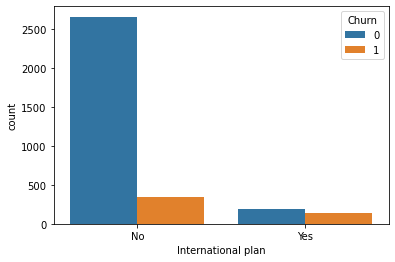

In [28]:
# use seaborn to plot a bar chart (using sns.countplot)
# you should plot the column 'International plan' and use the hue parameter to group by churn

### your code here
import seaborn as sns

sns.countplot(data=df,x="International plan",hue="Churn")